In [3]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("../data/02_casuales_limpio.csv", index_col = 0)

In [5]:
df.head()

,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,sensacion_termica,humedad,viento,casuales
0,2018-01-01,winter,0,1,1,1,NO,2,18.18125,80.5833,10.749882,331
1,2018-01-02,winter,0,1,0,2,SI,2,17.68695,69.6087,16.652113,131
2,2018-01-03,winter,0,1,0,3,SI,1,9.47025,43.7273,16.636703,120
3,2018-01-04,winter,0,1,0,4,SI,1,10.60610,59.0435,10.739832,108
4,2018-01-05,winter,0,1,0,5,SI,1,11.46350,43.6957,12.522300,82


categoria inici final mes
mes cambiar numero para dar mas o menos peso 



In [6]:
df.columns

Index(['fecha', 'estacion', 'año', 'mes', 'vacaciones', 'dia_semana',
       'laborable', 'clima', 'sensacion_termica', 'humedad', 'viento',
       'casuales'],
      dtype='object')

In [7]:
df_analisis = df.drop(['fecha','sensacion_termica', 'humedad', 'viento'], axis = 1)

In [8]:
df_analisis.head()

,estacion,año,mes,vacaciones,dia_semana,laborable,clima,casuales
0,winter,0,1,1,1,NO,2,331
1,winter,0,1,0,2,SI,2,131
2,winter,0,1,0,3,SI,1,120
3,winter,0,1,0,4,SI,1,108
4,winter,0,1,0,5,SI,1,82


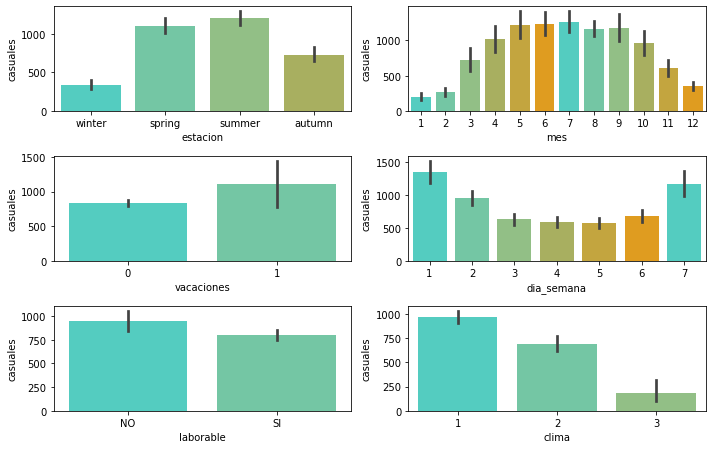

In [25]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10, 8))

axes=axes.flat #flat es para aplanar los ejes.
columnas_analisis=df_analisis.drop(['casuales', 'año'], axis = 1).columns

for i, col in enumerate(columnas_analisis):
  sns.barplot(data=df_analisis, x=col, y = 'casuales', ax=axes[i],palette=sns.blend_palette(['turquoise','orange'] ))

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.tight_layout()


### Valores encoding

Columna MesMapa4
- 5-6-7-8-9 = 3
- 4-10 = 2
- 3-11 = 1
- 1-2-12 = 0

Columna MesMapa3
- 5-6-7-8-9 = 2
- 4-3-10-11 = 1
- 1-2-12 = 0

Columna Estacion:
- Summer- spring = 2
- autumn = 1
- winter = 0

Columna dia_semana:
- 1-2-7 = 1
- 3-4-5-6 = 0

Columna clima:
- 3 = 0
- 2 = 1
- 1 = 2

Columna laborable:
- NO = 0
- Si = 1


In [243]:
mapa_mes = {5:3, 6:3, 7:3, 8:3, 9:3, 4:2, 10:2, 3:1, 11:1, 1:0, 2:0, 12:0}
mapa_estacion = {"summer": 2, "spring": 2, "autumn":1, "winter":0}
mapa_dia_semana = {1:1, 2:1, 7:1, 3:0, 4:0, 5:0, 6:0}
mapa_clima = {3:0, 2:1, 1:2}
mapa_laborable = {"NO": 0, "SI":1}

In [244]:
df["mes_map"] = df["mes"].map(mapa_mes)
df["estacion_map"] = df["estacion"].map(mapa_estacion)
df["dia_semana_map"] = df["dia_semana"].map(mapa_dia_semana)
df["clima_map"] = df["clima"].map(mapa_clima)
df["laborable_map"] = df["laborable"].map(mapa_laborable)

In [245]:
df

,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,sensacion_termica,humedad,viento,casuales,mes_map,estacion_map,dia_semana_map,clima_map,laborable_map
0,2018-01-01,winter,0,1,1,1,NO,2,18.18125,80.5833,10.749882,331,0,0,1,1,0
1,2018-01-02,winter,0,1,0,2,SI,2,17.68695,69.6087,16.652113,131,0,0,1,1,1
2,2018-01-03,winter,0,1,0,3,SI,1,9.47025,43.7273,16.636703,120,0,0,0,2,1
3,2018-01-04,winter,0,1,0,4,SI,1,10.60610,59.0435,10.739832,108,0,0,0,2,1
4,2018-01-05,winter,0,1,0,5,SI,1,11.46350,43.6957,12.522300,82,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,winter,1,12,0,5,SI,2,11.33210,65.2917,23.458911,247,0,0,0,1,1
726,2019-12-28,winter,1,12,0,6,NO,2,12.75230,59.0000,10.416557,644,0,0,0,1,0
727,2019-12-29,winter,1,12,0,7,NO,2,12.12000,75.2917,8.333661,159,0,0,1,1,0
728,2019-12-30,winter,1,12,0,1,SI,1,11.58500,48.3333,23.500518,364,0,0,1,2,1


In [246]:
df.drop(["fecha","estacion", "mes", "dia_semana", "clima", "laborable"], axis=1, inplace=True)

In [247]:
df.to_csv("../data/03_casuales_cod.csv")

____________

In [248]:
df.columns

Index(['año', 'vacaciones', 'sensacion_termica', 'humedad', 'viento',
       'casuales', 'mes_map', 'estacion_map', 'dia_semana_map', 'clima_map',
       'laborable_map'],
      dtype='object')

### Estandarización

In [249]:
scaler = StandardScaler()

In [250]:
df_scaler = df.copy()

In [251]:
df_scaler.drop([ 'año',  'vacaciones', 'casuales', 'mes_map', 'estacion_map', 'dia_semana_map', 'clima_map','laborable_map'], axis = 1, inplace = True)

df_scaler.columns = df_scaler.columns + "_standar"

df_scaler.head(2)

,sensacion_termica_standar,humedad_standar,viento_standar
0,18.18125,80.5833,10.749882
1,17.68695,69.6087,16.652113


In [252]:
scaler.fit(df_scaler)

StandardScaler()

In [253]:
X_escaladas = scaler.transform(df_scaler)

In [254]:
df_scaler = pd.DataFrame(X_escaladas, columns= df_scaler.columns)

In [255]:
df_scaler.head(2)

,sensacion_termica_standar,humedad_standar,viento_standar
0,-0.680818,1.252343,-0.387833
1,-0.741507,0.480996,0.748899


In [256]:
df_standar_cod = pd.concat([df, df_scaler], axis = 1)

In [257]:
df_standar_cod

,año,vacaciones,sensacion_termica,humedad,viento,casuales,mes_map,estacion_map,dia_semana_map,clima_map,laborable_map,sensacion_termica_standar,humedad_standar,viento_standar
0,0,1,18.18125,80.5833,10.749882,331,0,0,1,1,0,-0.680818,1.252343,-0.387833
1,0,0,17.68695,69.6087,16.652113,131,0,0,1,1,1,-0.741507,0.480996,0.748899
2,0,0,9.47025,43.7273,16.636703,120,0,0,0,2,1,-1.750344,-1.338073,0.745931
3,0,0,10.60610,59.0435,10.739832,108,0,0,0,2,1,-1.610886,-0.261577,-0.389769
4,0,0,11.46350,43.6957,12.522300,82,0,0,0,2,1,-1.505615,-1.340294,-0.046477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,11.33210,65.2917,23.458911,247,0,0,0,1,1,-1.521749,0.177576,2.059845
726,1,0,12.75230,59.0000,10.416557,644,0,0,0,1,0,-1.347378,-0.264634,-0.452029
727,1,0,12.12000,75.2917,8.333661,159,0,0,1,1,0,-1.425011,0.880424,-0.853182
728,1,0,11.58500,48.3333,23.500518,364,0,0,1,2,1,-1.490698,-1.014341,2.067858


In [258]:
df_standar_cod.isnull().sum()

año                          0
vacaciones                   0
sensacion_termica            0
humedad                      0
viento                       0
casuales                     0
mes_map                      0
estacion_map                 0
dia_semana_map               0
clima_map                    0
laborable_map                0
sensacion_termica_standar    0
humedad_standar              0
viento_standar               0
dtype: int64

In [259]:
df_standar_cod.drop(["sensacion_termica", "humedad", "viento"], axis=1, inplace=True)

In [260]:
df_standar_cod.to_csv("../data/04_casuales_cod_sta.csv")